This notebook is the original work of Vikrant Singh [ vikrant_s@ch.iitr.ac.in , 7088704043 ], created as part of the Finance Club Summer 2025 Open Project. It showcases a comprehensive approach to credit risk modeling, including data exploration, feature engineering, and predictive modeling for credit card default prediction. All analysis, code, and insights presented here are my own. 

For any queries or issue ,Please feel free to contact.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('train_dataset_final1.csv')
data_val=pd.read_csv('validate_dataset_final.csv')

# Description

In [3]:
df=data.copy()

In [4]:
df.shape

(25247, 27)

In [5]:
df.sample(5)

Customer_ID  marriage  sex  education  LIMIT_BAL   age  pay_0  pay_2  \
7791         12808         2    1          2      70000  24.0      0      0   
22537        27554         1    1          3     150000  52.0     -1     -1   
22518        27535         1    1          3     420000  39.0     -2     -2   
6750         11767         2    1          2     130000  27.0     -1     -1   
5023         10040         2    1          2      50000  27.0      0      0   

       pay_3  pay_4  ...  Bill_amt6  pay_amt1  pay_amt2  pay_amt3  pay_amt4  \
7791       0      0  ...   67268.05   3167.25   2521.16   2399.94   2600.13   
22537     -1     -1  ...       0.00   1125.01   1202.89   2064.28   2847.00   
22518     -2     -2  ...    2439.50   3633.84  11353.01   5254.94  23001.11   
6750      -1     -1  ...    5149.09      0.22    382.32   2898.06   1899.93   
5023       0      0  ...   10391.03   1999.92   1622.22   2013.06    500.05   

       pay_amt5  pay_amt6  AVG_Bill_amt  PAY_TO_BILL_ratio  next_month_default  
7791    2614.16   2375.93      67150.33               0.04                   0  
22537      0.00      0.01       1198.17               1.01                   0  
22518   2439.07      0.00       8007.50               0.95                   0  
6750     500.00    499.87       2689.00               0.38                   0  
5023     500.14    499.72      17007.17               0.07                   0  

[5 rows x 27 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247 entries, 0 to 25246
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         25247 non-null  int64  
 1   marriage            25247 non-null  int64  
 2   sex                 25247 non-null  int64  
 3   education           25247 non-null  int64  
 4   LIMIT_BAL           25247 non-null  int64  
 5   age                 25121 non-null  float64
 6   pay_0               25247 non-null  int64  
 7   pay_2               25247 non-null  int64  
 8   pay_3               25247 non-null  int64  
 9   pay_4               25247 non-null  int64  
 10  pay_5               25247 non-null  int64  
 11  pay_6               25247 non-null  int64  
 12  Bill_amt1           25247 non-null  float64
 13  Bill_amt2           25247 non-null  float64
 14  Bill_amt3           25247 non-null  float64
 15  Bill_amt4           25247 non-null  float64
 16  Bill

In [7]:
df.isnull().sum()

Customer_ID             0
marriage                0
sex                     0
education               0
LIMIT_BAL               0
age                   126
pay_0                   0
pay_2                   0
pay_3                   0
pay_4                   0
pay_5                   0
pay_6                   0
Bill_amt1               0
Bill_amt2               0
Bill_amt3               0
Bill_amt4               0
Bill_amt5               0
Bill_amt6               0
pay_amt1                0
pay_amt2                0
pay_amt3                0
pay_amt4                0
pay_amt5                0
pay_amt6                0
AVG_Bill_amt            0
PAY_TO_BILL_ratio       0
next_month_default      0
dtype: int64

In [8]:
df.isnull().mean()*100

Customer_ID           0.000000
marriage              0.000000
sex                   0.000000
education             0.000000
LIMIT_BAL             0.000000
age                   0.499069
pay_0                 0.000000
pay_2                 0.000000
pay_3                 0.000000
pay_4                 0.000000
pay_5                 0.000000
pay_6                 0.000000
Bill_amt1             0.000000
Bill_amt2             0.000000
Bill_amt3             0.000000
Bill_amt4             0.000000
Bill_amt5             0.000000
Bill_amt6             0.000000
pay_amt1              0.000000
pay_amt2              0.000000
pay_amt3              0.000000
pay_amt4              0.000000
pay_amt5              0.000000
pay_amt6              0.000000
AVG_Bill_amt          0.000000
PAY_TO_BILL_ratio     0.000000
next_month_default    0.000000
dtype: float64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.describe()

Customer_ID      marriage           sex     education       LIMIT_BAL  \
count  25247.000000  25247.000000  25247.000000  25247.000000    25247.000000   
mean   17640.000000      1.551907      0.604111      1.852101   168342.060443   
std     7288.325459      0.522629      0.489050      0.797379   129892.784807   
min     5017.000000      0.000000      0.000000      0.000000    10000.000000   
25%    11328.500000      1.000000      0.000000      1.000000    50000.000000   
50%    17640.000000      2.000000      1.000000      2.000000   140000.000000   
75%    23951.500000      2.000000      1.000000      2.000000   240000.000000   
max    30263.000000      3.000000      1.000000      6.000000  1000000.000000   

                age         pay_0         pay_2         pay_3         pay_4  \
count  25121.000000  25247.000000  25247.000000  25247.000000  25247.000000   
mean      35.438199     -0.042857     -0.159544     -0.190359     -0.241415   
std        9.174998      1.099315      1.173990      1.172636      1.146753   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      7.000000   

       ...      Bill_amt6       pay_amt1      pay_amt2       pay_amt3  \
count  ...   25247.000000   25247.000000  2.524700e+04   25247.000000   
mean   ...   38806.221029    5718.624966  6.047352e+03    5288.910651   
std    ...   59182.792531   16806.842125  2.400962e+04   17851.879609   
min    ...       0.000000       0.000000  0.000000e+00       0.000000   
25%    ...    1241.710000     999.985000  9.219100e+02     399.990000   
50%    ...   17102.580000    2145.020000  2.026830e+03    1844.300000   
75%    ...   49245.195000    5031.150000  5.000190e+03    4600.640000   
max    ...  961663.620000  873551.980000  1.684259e+06  896040.150000   

            pay_amt4       pay_amt5       pay_amt6   AVG_Bill_amt  \
count   25247.000000   25247.000000   25247.000000   25247.000000   
mean     4865.960834    4906.766828    5270.499287   44859.647485   
std     15979.116544   15860.726852   17960.816915   62819.226119   
min         0.000000       0.000000       0.000000  -56043.170000   
25%       300.150000     262.365000     130.070000    4858.670000   
50%      1500.100000    1513.790000    1500.040000   21102.830000   
75%      4014.990000    4099.890000    4018.780000   57136.580000   
max    621000.080000  426529.180000  528666.150000  877313.830000   

       PAY_TO_BILL_ratio  next_month_default  
count       25247.000000        25247.000000  
mean            0.362962            0.190399  
std             5.047206            0.392624  
min          -546.930000            0.000000  
25%             0.040000            0.000000  
50%             0.090000            0.000000  
75%             0.590000            0.000000  
max           205.380000            1.000000  

[8 rows x 27 columns]

In [11]:
df.corr()['next_month_default']

Customer_ID          -0.001893
marriage             -0.025677
sex                  -0.037537
education             0.026943
LIMIT_BAL            -0.146010
age                   0.017731
pay_0                 0.312943
pay_2                 0.252125
pay_3                 0.226015
pay_4                 0.207488
pay_5                 0.196329
pay_6                 0.180387
Bill_amt1            -0.021729
Bill_amt2            -0.016079
Bill_amt3            -0.016706
Bill_amt4            -0.012032
Bill_amt5            -0.008983
Bill_amt6            -0.005725
pay_amt1             -0.068882
pay_amt2             -0.053623
pay_amt3             -0.050925
pay_amt4             -0.053624
pay_amt5             -0.046960
pay_amt6             -0.047116
AVG_Bill_amt         -0.014694
PAY_TO_BILL_ratio    -0.005528
next_month_default    1.000000
Name: next_month_default, dtype: float64

# EXPLORATORY DATA ANALYSIS

In [12]:
df.dropna(inplace=True)

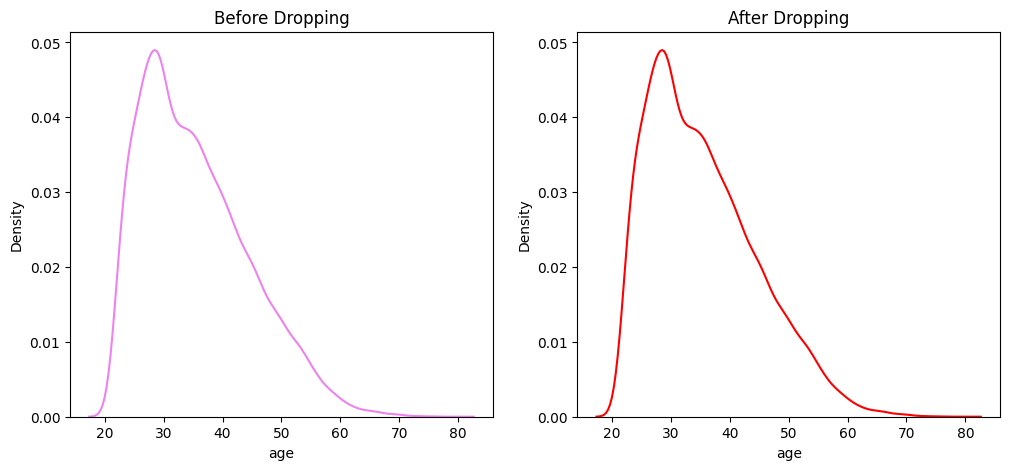

In [13]:
fig,axes=plt.subplots(1,2 ,figsize=(12,5))
sns.kdeplot(data['age'],color='violet',ax=axes[0])
axes[0].set_title('Before Dropping')
sns.kdeplot(df['age'],color='red',ax=axes[1])
axes[1].set_title('After Dropping')
plt.show()

In [14]:
df['education'].value_counts()

education
2    11657
1     8944
3     4096
5      252
4      115
6       43
0       14
Name: count, dtype: int64

In [15]:
filter=(df['education']==0) |(df['education']==5)|(df['education']==6)
df.loc[filter,'education']=4

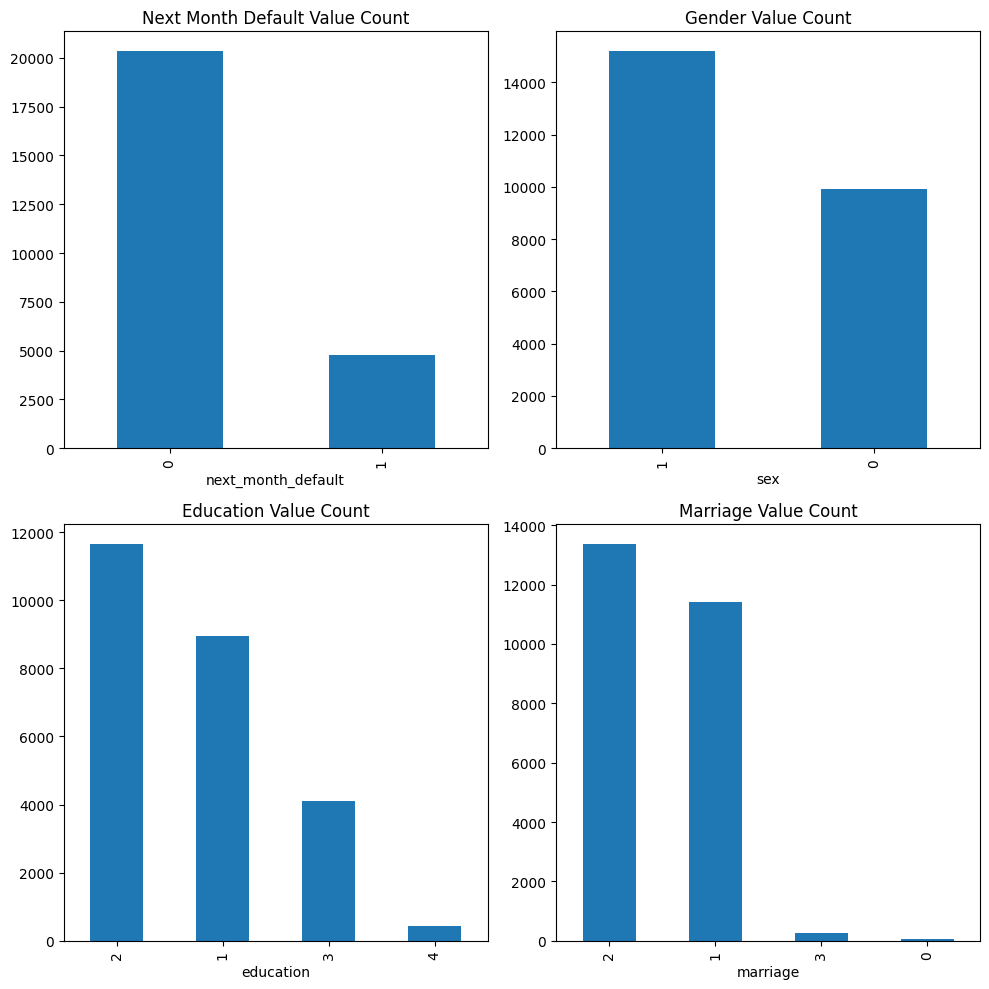

In [16]:
fig,axes=plt.subplots(2,2 ,figsize=(10,10))

df['next_month_default'].value_counts().plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Next Month Default Value Count')

df['sex'].value_counts().plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Gender Value Count')

df['education'].value_counts().plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Education Value Count')

df['marriage'].value_counts().plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Marriage Value Count')

plt.tight_layout()
plt.show()

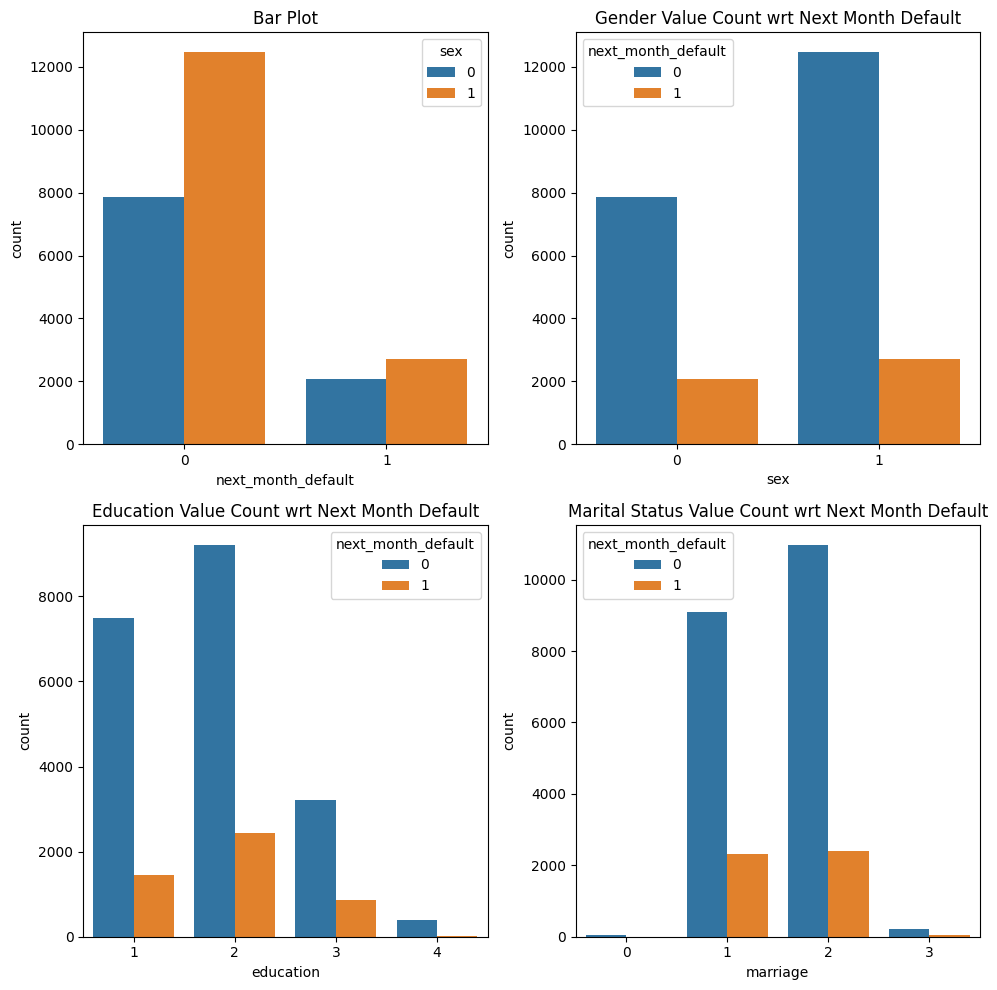

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.countplot(data=df ,x='next_month_default',hue='sex', ax=axes[0, 0])
axes[0, 0].set_title('Bar Plot')

sns.countplot(data=df, x='sex', hue='next_month_default', ax=axes[0, 1])
axes[0, 1].set_title('Gender Value Count wrt Next Month Default')

sns.countplot(data=df, x='education', hue='next_month_default', ax=axes[1, 0])
axes[1, 0].set_title('Education Value Count wrt Next Month Default')

sns.countplot(data=df, x='marriage', hue='next_month_default', ax=axes[1, 1])
axes[1, 1].set_title('Marital Status Value Count wrt Next Month Default')

plt.tight_layout()
plt.show()


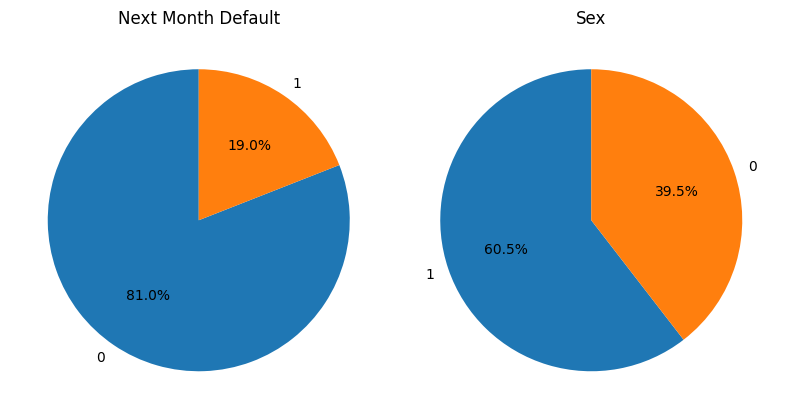

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(8, 8))

axes[0].pie(df['next_month_default'].value_counts(),labels=df['next_month_default'].value_counts().index,  autopct='%1.1f%%',startangle=90)
axes[0].set_title('Next Month Default')

axes[ 1].pie(df['sex'].value_counts(),labels=df['sex'].value_counts().index,autopct='%1.1f%%',startangle=90)
axes[1].set_title('Sex')

plt.tight_layout()
plt.show()


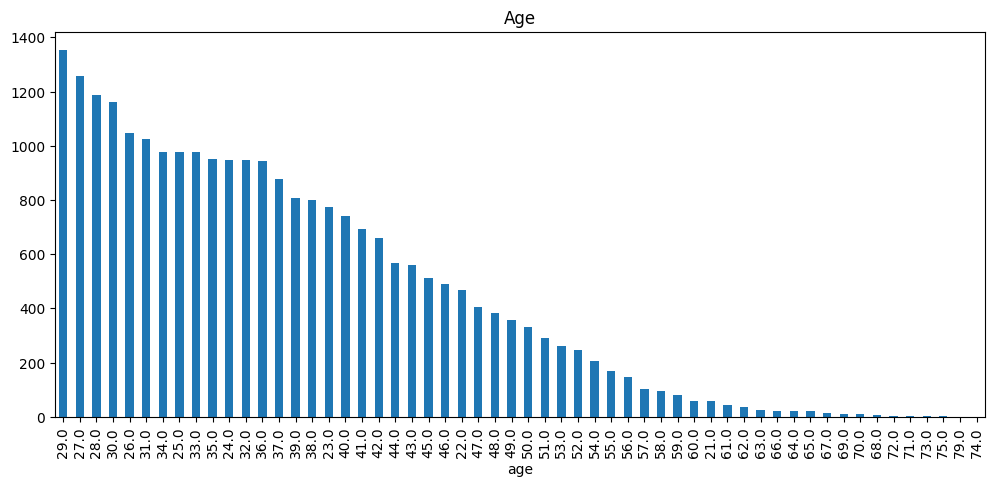

In [19]:
fig,axes=plt.subplots(1,1,figsize=(12,5))
df['age'].value_counts().plot(kind='bar',ax=axes)
axes.set_title('Age')
plt.show()

In [20]:
list_1=df[['Customer_ID', 'marriage', 'sex', 'education', 'LIMIT_BAL', 'age','next_month_default']]
list_2=df[['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6','next_month_default']]
list_3=df[['Bill_amt1','Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6','next_month_default']]
list_4=df[['pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6','next_month_default']]


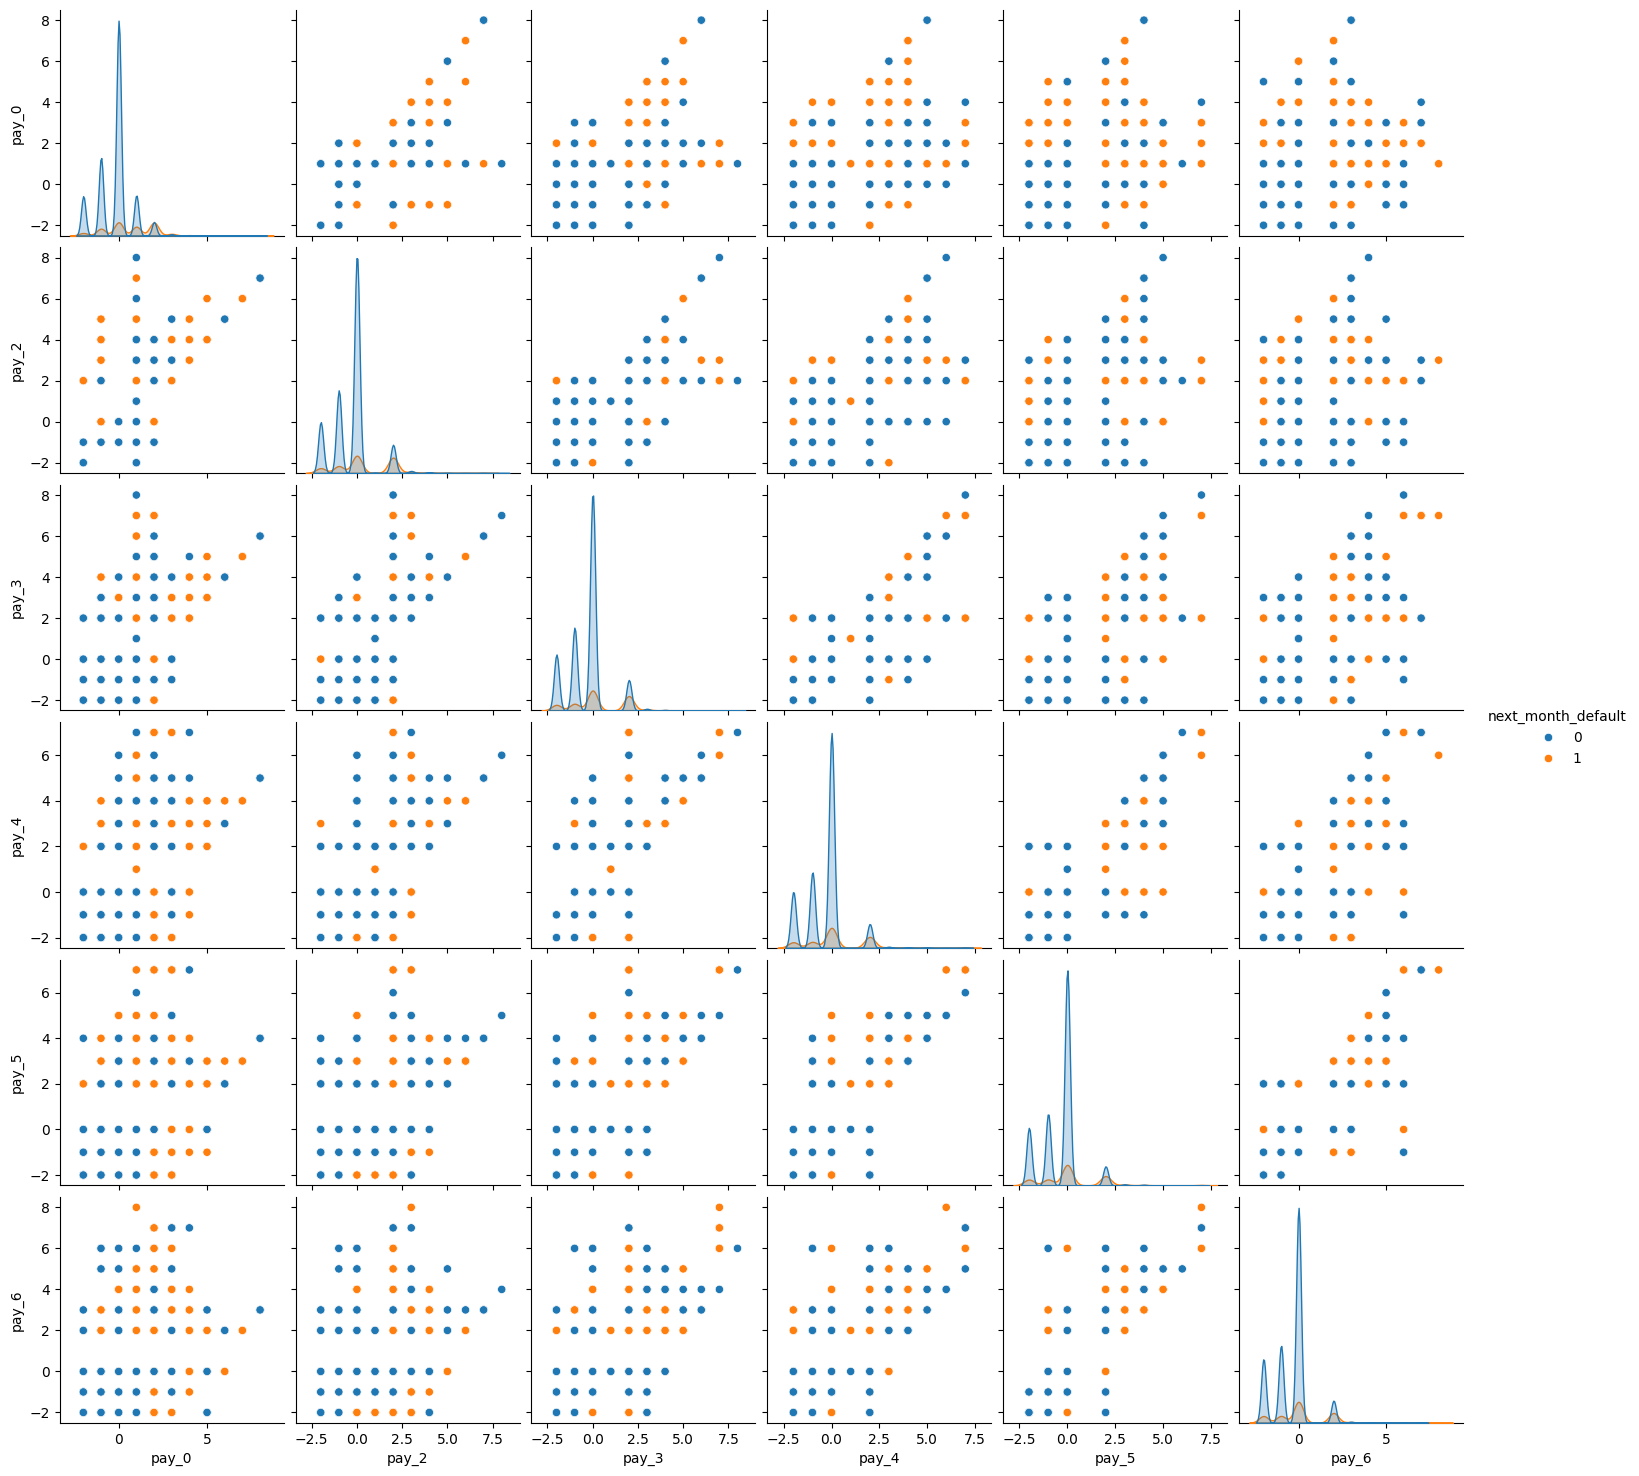

In [21]:
sns.pairplot(data=list_2,hue='next_month_default')

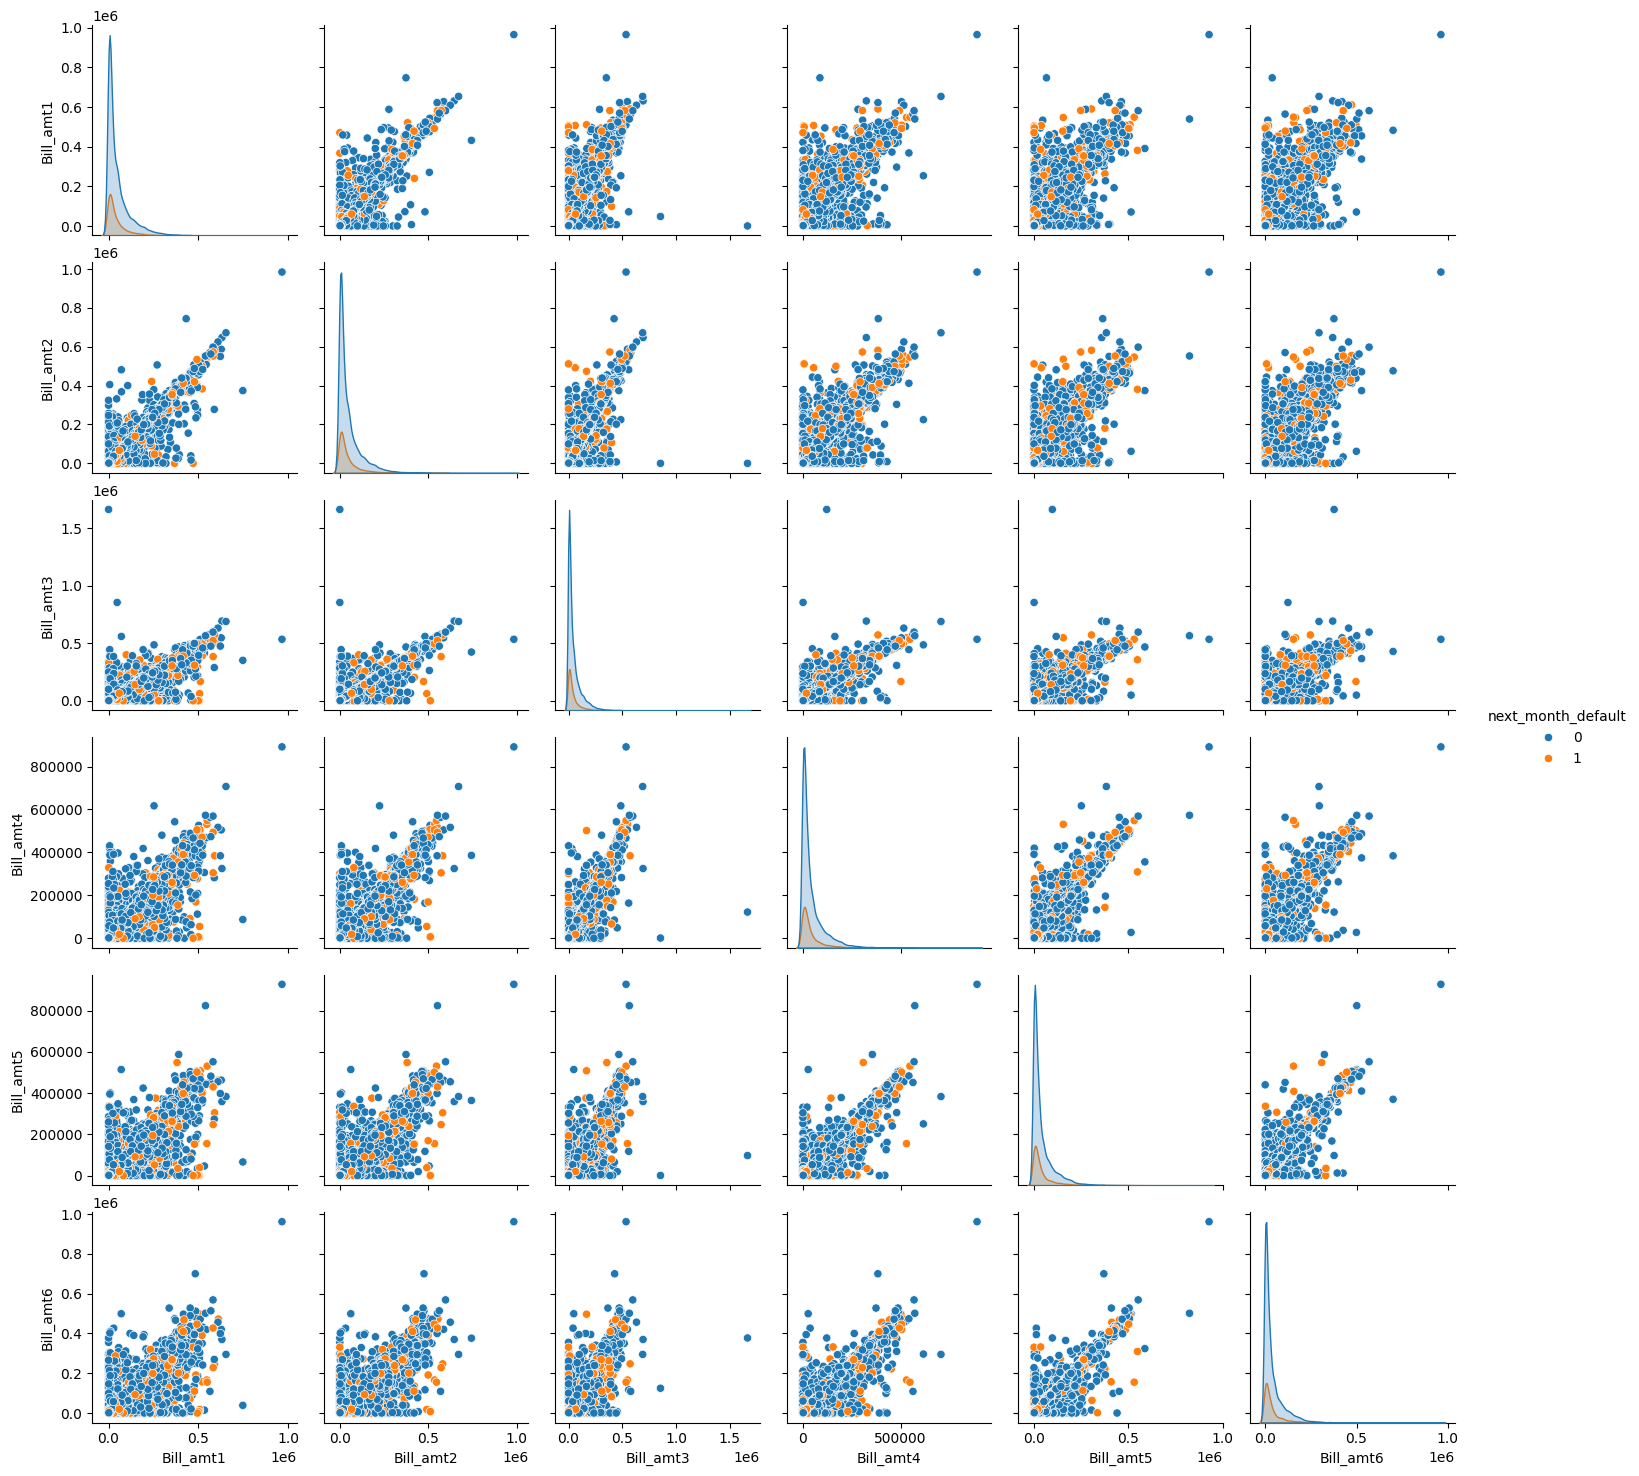

In [22]:
sns.pairplot(data=list_3,hue='next_month_default')

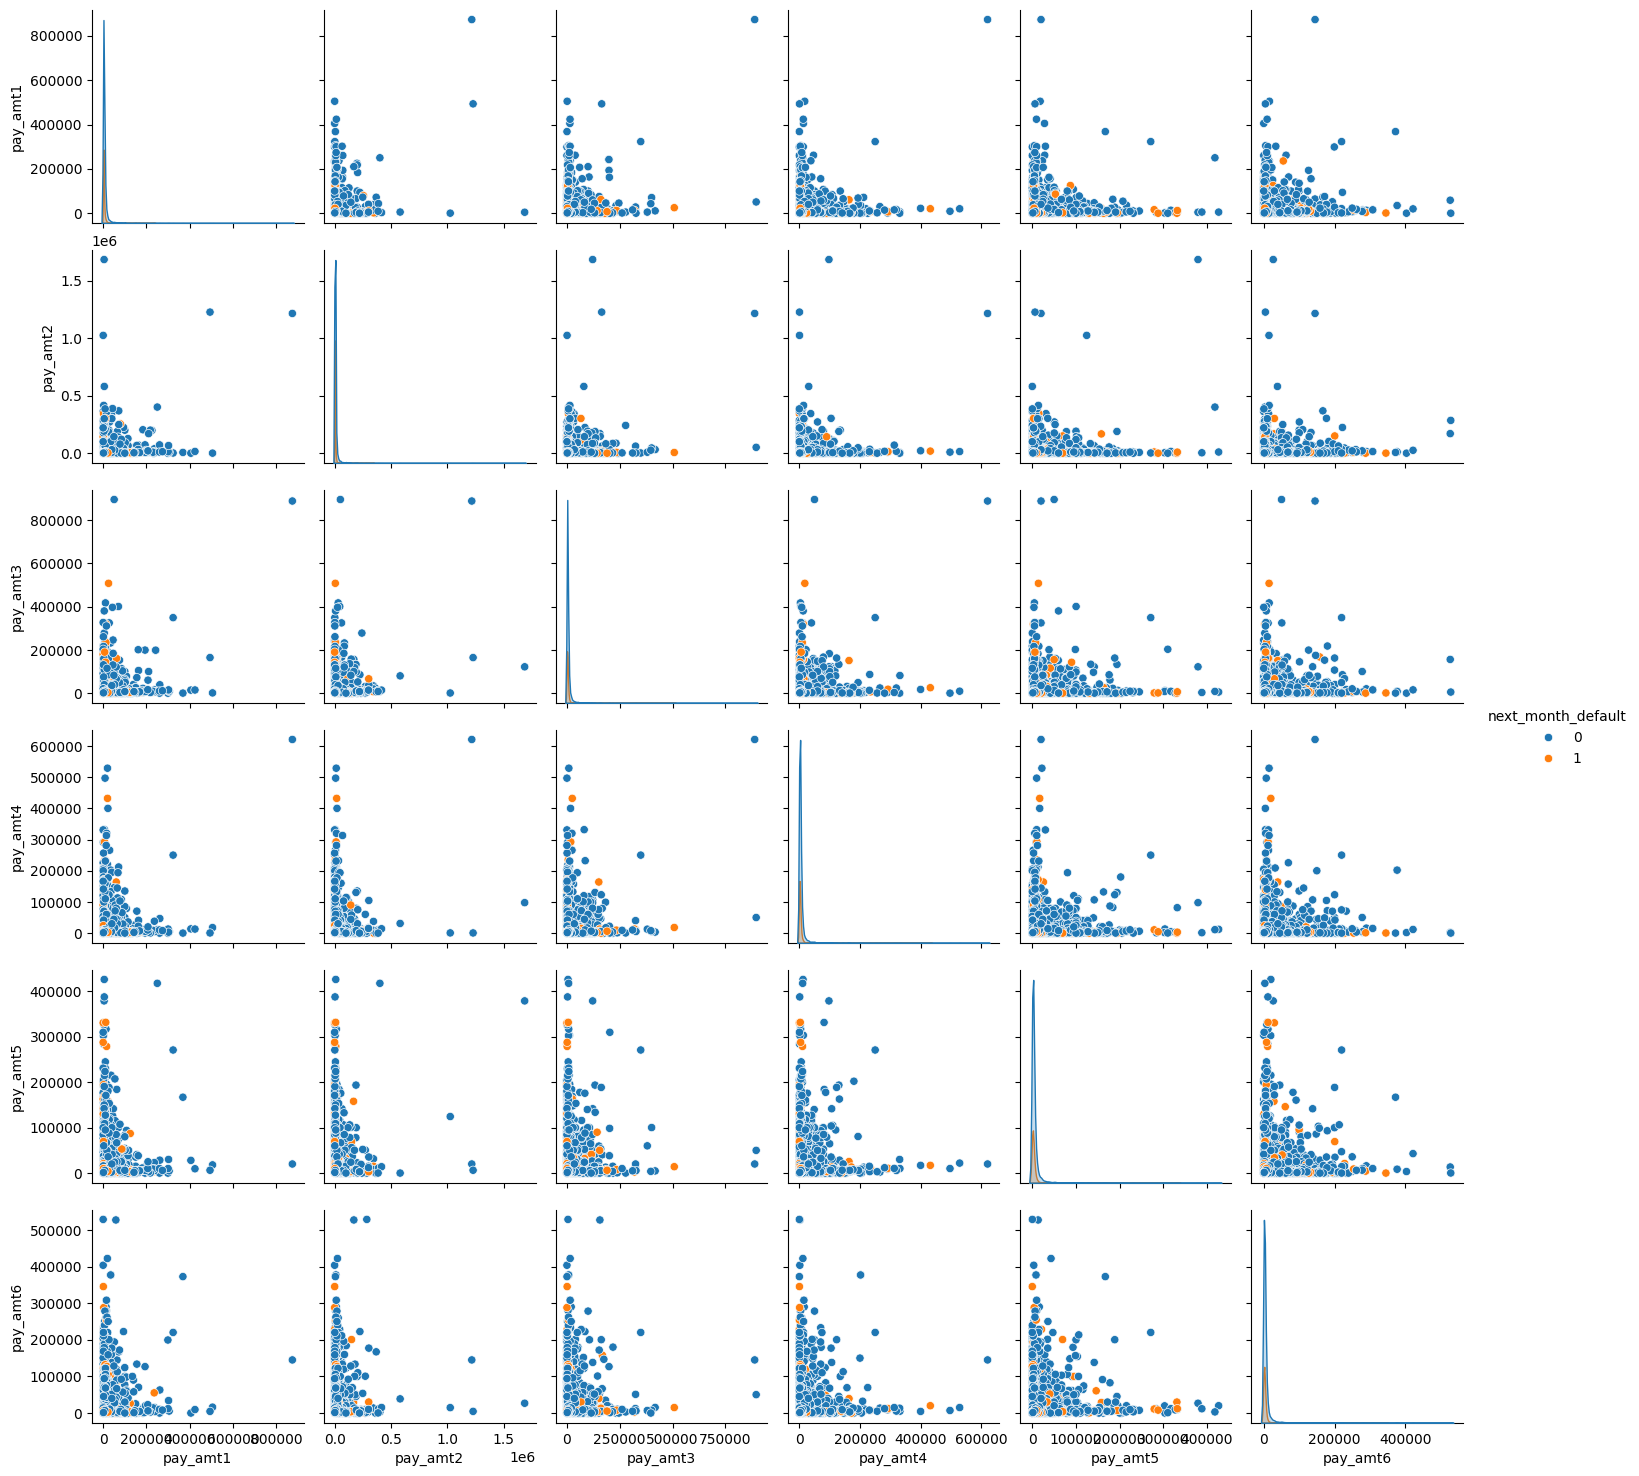

In [23]:
sns.pairplot(data=list_4,hue='next_month_default')

# FEATURE ENGINEERING AND FEATURE CONSTRUCTION

In [24]:
df['total_bill']=df['Bill_amt1']+df['Bill_amt2']+df['Bill_amt3']+df['Bill_amt4']+df['Bill_amt5']+df['Bill_amt6']

In [25]:
df['total_payment']=df['pay_amt1']+df['pay_amt2']+df['pay_amt3']+df['pay_amt4']+df['pay_amt5']+df['pay_amt6']

In [26]:
df['total_dues']=df['total_bill']-df['total_payment']

In [27]:
df['avg_dues']=df['total_dues'].mean()

In [28]:
df['avg_monthly_payment']=df['total_payment']/6

In [29]:
df['due_1']=df['Bill_amt1']-df['pay_amt1']
df['due_2']=df['Bill_amt2']-df['pay_amt2']
df['due_3']=df['Bill_amt3']-df['pay_amt3']
df['due_4']=df['Bill_amt4']-df['pay_amt4']
df['due_5']=df['Bill_amt5']-df['pay_amt5']
df['due_6']=df['Bill_amt6']-df['pay_amt6']

In [30]:
pay_columns = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

df['delinquency_probability'] = df[pay_columns].apply(lambda row: (row >= 1).sum() / len(pay_columns), axis=1)

In [31]:
df.head()

Customer_ID  marriage  sex  education  LIMIT_BAL   age  pay_0  pay_2  \
0         5017         2    0          2      60000  25.0      2      2   
1         5018         2    1          1     290000  24.0      0      0   
2         5019         1    0          2     180000  63.0      0      0   
3         5020         1    1          2     210000  43.0      0      0   
4         5021         2    0          1     280000  32.0     -2     -2   

   pay_3  pay_4  ...  total_dues       avg_dues  avg_monthly_payment  \
0      2      0  ...   241111.88  237510.852141          1326.185000   
1     -2     -2  ...    11160.47  237510.852141           674.998333   
2      0      0  ...   290474.38  237510.852141          2009.286667   
3      0      0  ...   498929.03  237510.852141          3074.916667   
4     -2     -2  ...    19571.32  237510.852141          8552.366667   

      due_1     due_2     due_3     due_4     due_5     due_6  \
0  58323.65  60728.22  55337.89  26780.23  20691.50  19250.39   
1  11157.67     -0.17      0.88  -2699.45   2700.96      0.58   
2  45844.02  46721.92  48188.60  48748.55  49979.56  50991.73   
3  87804.37  89535.10  87251.85  82611.59  77672.75  74053.37   
4  18666.62  -2187.23 -41841.30  42832.39   2099.76      1.08   

   delinquency_probability  
0                      0.5  
1                      0.0  
2                      0.0  
3                      0.0  
4                      0.0  

[5 rows x 39 columns]

In [32]:
cor=df.corr()

In [33]:
cor

Customer_ID  marriage       sex  education  \
Customer_ID                 1.000000 -0.017721  0.004486   0.004811   
marriage                   -0.017721  1.000000 -0.031153  -0.154865   
sex                         0.004486 -0.031153  1.000000   0.018025   
education                   0.004811 -0.154865  0.018025   1.000000   
LIMIT_BAL                   0.009930 -0.102432  0.024124  -0.231747   
age                        -0.000576 -0.414754 -0.090222   0.183351   
pay_0                      -0.011557  0.020485 -0.051487   0.111789   
pay_2                      -0.003144  0.023701 -0.066804   0.134057   
pay_3                      -0.006345  0.031781 -0.060755   0.121896   
pay_4                      -0.001038  0.032293 -0.061169   0.116369   
pay_5                      -0.003734  0.032412 -0.053040   0.104937   
pay_6                      -0.009060  0.031665 -0.043854   0.087699   
Bill_amt1                   0.004600 -0.022308 -0.032743   0.016557   
Bill_amt2                   0.001329 -0.021563 -0.029634   0.011440   
Bill_amt3                   0.001897 -0.024120 -0.022834   0.006765   
Bill_amt4                  -0.003668 -0.021676 -0.020238  -0.005397   
Bill_amt5                  -0.002212 -0.022913 -0.014120  -0.011814   
Bill_amt6                  -0.002329 -0.018611 -0.013682  -0.013966   
pay_amt1                   -0.006723 -0.004227 -0.001598  -0.044712   
pay_amt2                    0.004330 -0.005254 -0.000831  -0.030708   
pay_amt3                   -0.008452 -0.002974 -0.005866  -0.040364   
pay_amt4                   -0.005781 -0.014207 -0.001875  -0.040690   
pay_amt5                    0.002983 -0.001550 -0.003584  -0.043858   
pay_amt6                   -0.007703 -0.005272 -0.004078  -0.042044   
AVG_Bill_amt                0.000176 -0.022958 -0.023794   0.001729   
PAY_TO_BILL_ratio           0.005862 -0.002084  0.010058  -0.012857   
next_month_default         -0.002147 -0.025934 -0.037522   0.031768   
total_bill                  0.000150 -0.023057 -0.023940   0.001606   
total_payment              -0.005486 -0.009554 -0.004974  -0.068917   
total_dues                  0.001107 -0.022465 -0.024181   0.013612   
avg_dues                         NaN       NaN       NaN        NaN   
avg_monthly_payment        -0.005486 -0.009554 -0.004974  -0.068917   
due_1                       0.006178 -0.021459 -0.032559   0.026967   
due_2                      -0.000139 -0.019335 -0.028694   0.021381   
due_3                       0.004081 -0.023413 -0.021377   0.017189   
due_4                      -0.002219 -0.018121 -0.019775   0.004805   
due_5                      -0.003002 -0.022598 -0.013237  -0.000366   
due_6                      -0.000001 -0.016844 -0.012323  -0.001245   
delinquency_probability    -0.005371 -0.007481 -0.037207   0.056657   

                         LIMIT_BAL       age     pay_0     pay_2     pay_3  \
Customer_ID               0.009930 -0.000576 -0.011557 -0.003144 -0.006345   
marriage                 -0.102432 -0.414754  0.020485  0.023701  0.031781   
sex                       0.024124 -0.090222 -0.051487 -0.066804 -0.060755   
education                -0.231747  0.183351  0.111789  0.134057  0.121896   
LIMIT_BAL                 1.000000  0.142656 -0.268463 -0.294710 -0.282969   
age                       0.142656  1.000000 -0.041554 -0.053909 -0.053878   
pay_0                    -0.268463 -0.041554  1.000000  0.667422  0.569577   
pay_2                    -0.294710 -0.053909  0.667422  1.000000  0.766398   
pay_3                    -0.282969 -0.053878  0.569577  0.766398  1.000000   
pay_4                    -0.264574 -0.047019  0.535294  0.662830  0.775651   
pay_5                    -0.246150 -0.052719  0.507892  0.624063  0.686560   
pay_6                    -0.230683 -0.047314  0.471047  0.575985  0.630893   
Bill_amt1                 0.285834  0.056507  0.187887  0.236912  0.211773   
Bill_amt2                 0.279389  0.054620  0.190400  0.236769  0.241155   
Bill_amt3     

In [34]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [35]:
corr_features = correlation(df,0.85)
len(set(corr_features))

15

In [36]:
corr_features

{'AVG_Bill_amt',
 'Bill_amt2',
 'Bill_amt3',
 'Bill_amt4',
 'Bill_amt5',
 'Bill_amt6',
 'avg_monthly_payment',
 'due_1',
 'due_2',
 'due_3',
 'due_4',
 'due_5',
 'due_6',
 'total_bill',
 'total_dues'}

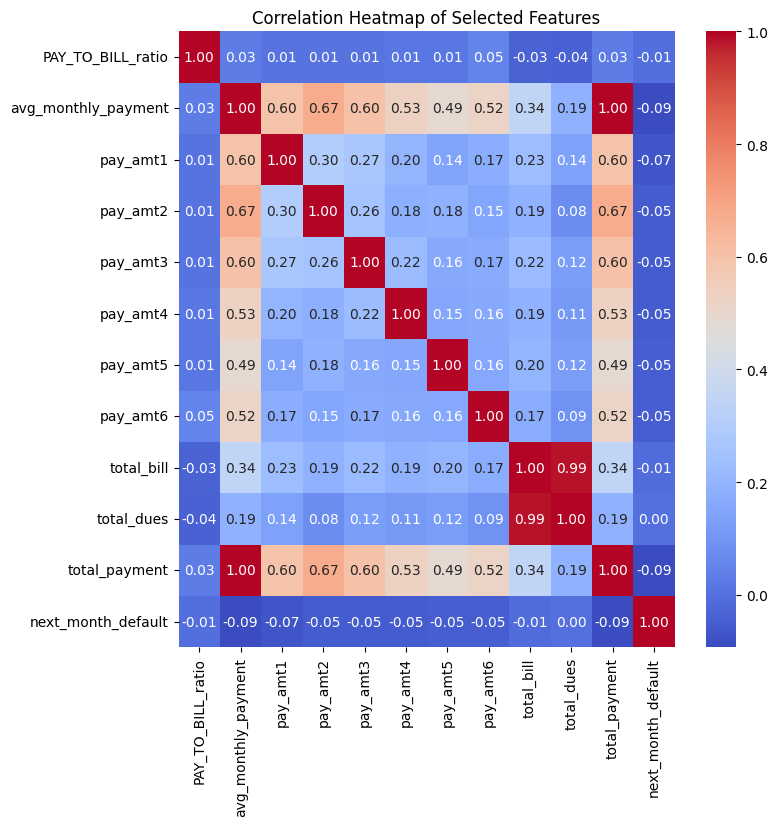

In [37]:
corr_features_1 = ['PAY_TO_BILL_ratio','avg_monthly_payment','pay_amt1','pay_amt2','pay_amt3','pay_amt4','pay_amt5',
                 'pay_amt6','total_bill','total_dues','total_payment','next_month_default']

df_selected = df[corr_features_1]

cor = df_selected.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
sns.heatmap(cor, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Selected Features')
plt.show()

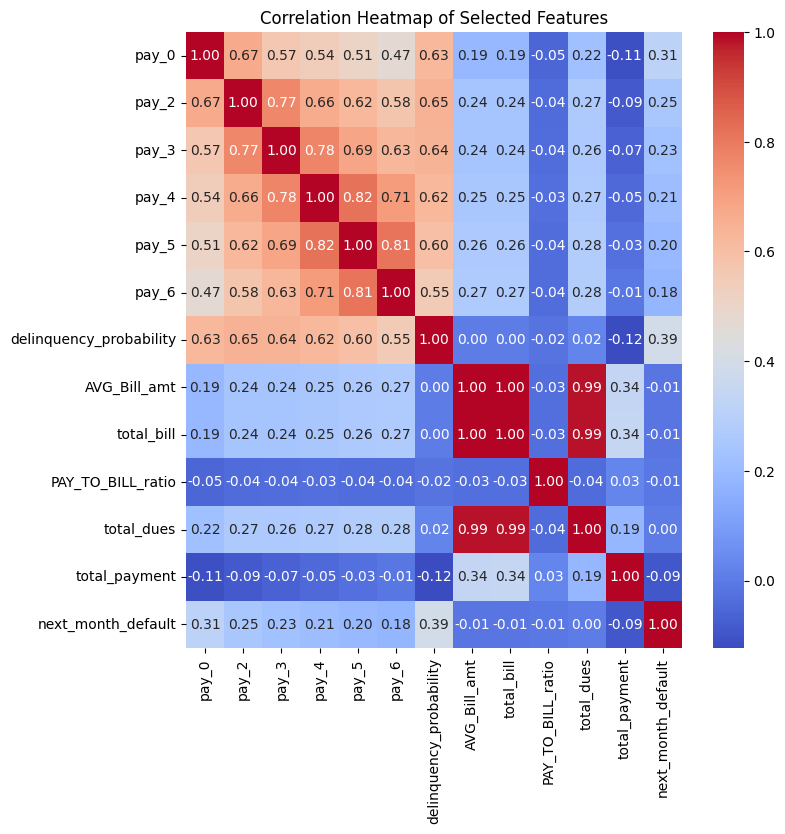

In [38]:
corr_features_2 = ['pay_0','pay_2','pay_3','pay_4','pay_5','pay_6','delinquency_probability','AVG_Bill_amt','total_bill','PAY_TO_BILL_ratio',
                 'total_dues','total_payment','next_month_default']

df_selected = df[corr_features_2]

cor = df_selected.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
sns.heatmap(cor, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Selected Features')
plt.show()

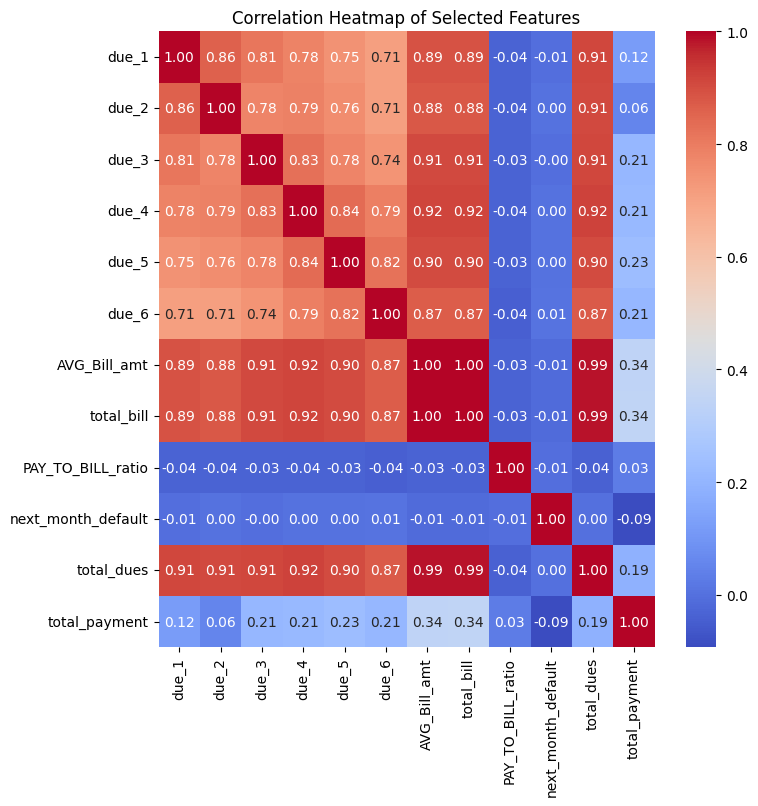

In [39]:
corr_features_3 = ['due_1','due_2','due_3','due_4','due_5','due_6','AVG_Bill_amt','total_bill','PAY_TO_BILL_ratio','next_month_default',
                 'total_dues','total_payment']

df_selected = df[corr_features_3]

cor = df_selected.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
sns.heatmap(cor, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Selected Features')
plt.show()

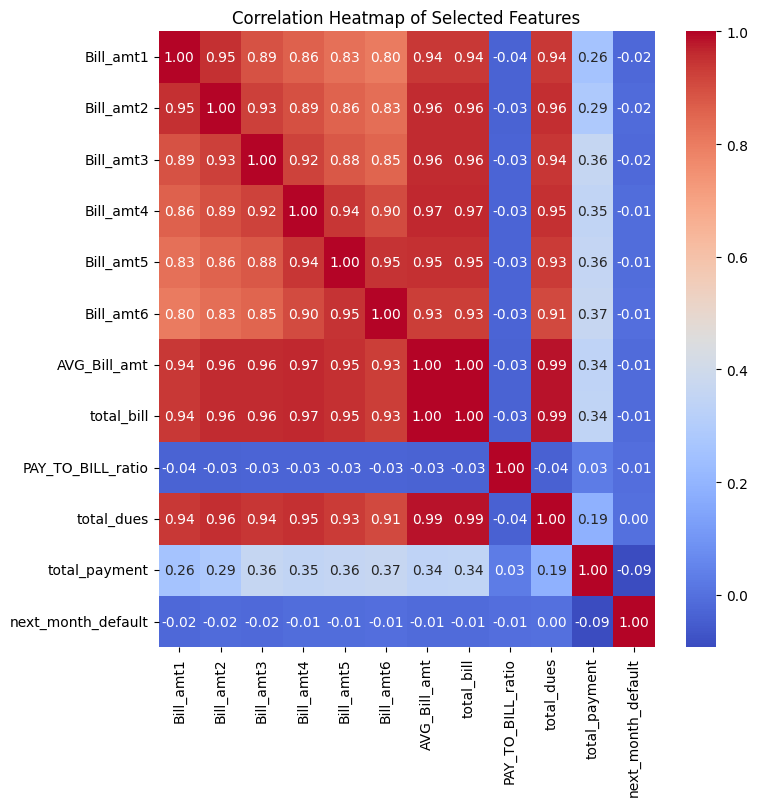

In [40]:
corr_features_4 = ['Bill_amt1','Bill_amt2','Bill_amt3','Bill_amt4','Bill_amt5','Bill_amt6','AVG_Bill_amt','total_bill','PAY_TO_BILL_ratio',
                 'total_dues','total_payment','next_month_default']


df_selected = df[corr_features_4]

cor = df_selected.corr()


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
sns.heatmap(cor, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Selected Features')
plt.show()


<Axes: xlabel='pay_3'>

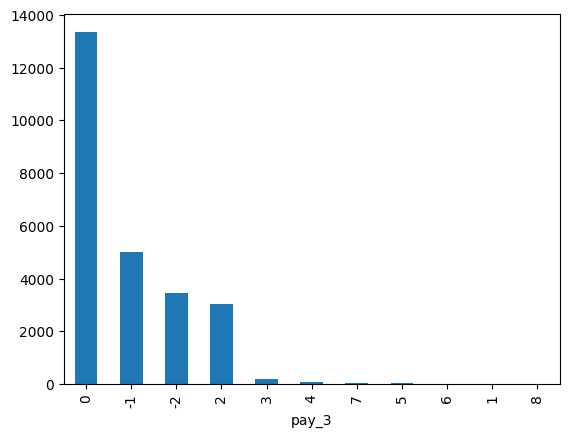

In [41]:
df['pay_3'].value_counts().plot(kind='bar')

In [42]:
df[(df['pay_0'] > 0)]['pay_0'].value_counts()

pay_0
1    3018
2    2036
3     242
4      56
5      20
8      14
6       8
7       8
Name: count, dtype: int64

In [43]:
x=df[['AVG_Bill_amt','LIMIT_BAL','PAY_TO_BILL_ratio','age','avg_monthly_payment','delinquency_probability',
    'due_1','due_2','due_3','due_4','due_5','due_6','education','marriage','pay_0','pay_2','pay_3','pay_4',
   'pay_5','pay_6','sex','total_dues']]
y=df['next_month_default']

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25121 entries, 0 to 25246
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customer_ID              25121 non-null  int64  
 1   marriage                 25121 non-null  int64  
 2   sex                      25121 non-null  int64  
 3   education                25121 non-null  int64  
 4   LIMIT_BAL                25121 non-null  int64  
 5   age                      25121 non-null  float64
 6   pay_0                    25121 non-null  int64  
 7   pay_2                    25121 non-null  int64  
 8   pay_3                    25121 non-null  int64  
 9   pay_4                    25121 non-null  int64  
 10  pay_5                    25121 non-null  int64  
 11  pay_6                    25121 non-null  int64  
 12  Bill_amt1                25121 non-null  float64
 13  Bill_amt2                25121 non-null  float64
 14  Bill_amt3                25

# DEALING WITH CLASS IMBALANCE

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [46]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [47]:
x_train_sm,y_train_sm=smote.fit_resample(x_train,y_train)

In [48]:
x_train_sm

AVG_Bill_amt  LIMIT_BAL  PAY_TO_BILL_ratio        age  \
0       20261.830000      20000           0.060000  30.000000   
1      102052.170000     260000           0.040000  50.000000   
2       12282.830000     200000           0.250000  29.000000   
3       21681.170000     160000           0.440000  29.000000   
4       19758.330000      20000           0.050000  23.000000   
...              ...        ...                ...        ...   
32573   62268.915853      71285           0.057430  28.285242   
32574  119577.640344     271913           0.040000  36.426059   
32575  213116.947292     232417           0.032417  42.274817   
32576   39957.667641      50243           0.039757  42.488826   
32577  100994.327676     100000           0.020000  29.391988   

       avg_monthly_payment  delinquency_probability          due_1  \
0              1116.651667                 0.500000   19287.460000   
1              3833.466667                 0.000000  126808.390000   
2              3049.701667                 0.333333    7886.230000   
3              9639.001667                 0.000000   49293.880000   
4              1038.823333                 0.000000   16311.500000   
...                    ...                      ...            ...   
32573          3708.465526                 0.145246   73243.859556   
32574          4878.824193                 0.000000  144033.355013   
32575          7469.202397                 0.379136  211203.149624   
32576          1665.381183                 0.174781   47653.917307   
32577          2433.057135                 1.000000   92532.818665   

               due_2          due_3          due_4  ...  education  marriage  \
0       19866.690000   19485.030000   18316.310000  ...          2         2   
1      116454.820000  109705.340000   95545.800000  ...          2         1   
2        5609.130000    7253.170000    2297.330000  ...          1         2   
3       -3572.600000   25826.280000  -25660.380000  ...          1         1   
4       18290.510000   19452.350000   19414.780000  ...          1         2   
...              ...            ...            ...  ...        ...       ...   
32573   70247.466767   65091.476097   47050.180481  ...          2         1   
32574  145242.959806  152677.951470   82035.347828  ...          1         1   
32575  227607.998890  220032.724188  188683.594778  ...          2         1   
32576   47082.442675   48788.308910   27611.487148  ...          1         1   
32577   99029.379885   94199.160408  102470.761397  ...          1         1   

       pay_0  pay_2  pay_3  pay_4  pay_5  pay_6  sex    total_dues  
0          2      2      2      0      0      0    0  1.148723e+05  
1          0      0      0      0      0      0    0  5.893118e+05  
2          1      2      0      0      0      0    0  5.539832e+04  
3          0      0     -1     -1      0      0    1  7.240278e+04  
4          0      0      0      0      0      0    0  1.123157e+05  
...      ...    ...    ...    ...    ...    ...  ...           ...  
32573      1      0      0      0      0      0    1  3.513612e+05  
32574      0      0      0      0      0      0    0  6.881934e+05  
32575      1      1      1      0      0      0    1  1.233888e+06  
32576      0      0      0      0      0      1    1  2.297573e+05  
32577      2      3      3      3      3      3    1  5.913680e+05  

[32578 rows x 22 columns]

Text(0.5, 1.0, 'After SMOTE')

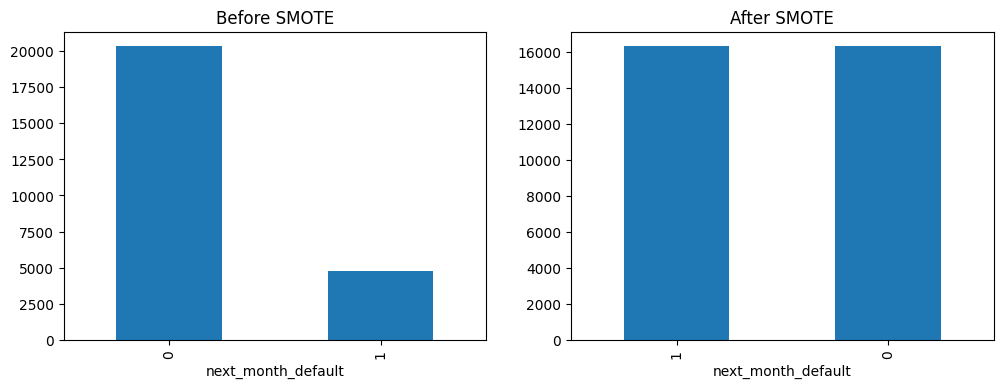

In [49]:
fig,axes=plt.subplots(1,2 ,figsize=(12,4))
y.value_counts().plot(kind='bar',ax=axes[0])
axes[0].set_title('Before SMOTE')
y_train_sm.value_counts().plot(kind='bar',ax=axes[1])
axes[1].set_title('After SMOTE')


In [50]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_sc=scaler.fit_transform(x_train_sm)
x_test_sc=scaler.transform(x_test)

# Model Selection & Hyperparameter Tuning

In [51]:
from sklearn.metrics  import accuracy_score,f1_score,classification_report,fbeta_score,make_scorer,confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# 1.Random Forest

In [52]:
param_grid = {
    'n_estimators': [100,200,300, 400],
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 7, 10],
    'max_features':['sqrt']
}

acc_scorer = make_scorer(f1_score)
grid_forest = GridSearchCV(RandomForestClassifier(class_weight='balanced'), param_grid,verbose=3, scoring = acc_scorer, cv=5)
%time grid_forest = grid_forest.fit(x_train_sm, y_train_sm)
print(grid_forest.best_estimator_)
print(grid_forest.best_score_)
forest_SMOTE = grid_forest.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100;, score=0.657 total time=   3.6s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100;, score=0.804 total time=   4.3s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100;, score=0.839 total time=   3.5s
[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100;, score=0.830 total time=   3.6s
[CV 5/5] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100;, score=0.829 total time=   3.8s
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200;, score=0.661 total time=   7.6s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200;, score=0.812 total time=  10.6s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200;, score=0.831 total time=   7.4s
[CV 4/5] END criterion=gini, max_depth=5, max_feat

In [53]:
y_pred_rf=forest_SMOTE.predict(x_test)
y_pred_train=forest_SMOTE.predict(x_train)


In [54]:
print(classification_report(y_test,y_pred_rf))
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4048
           1       0.51      0.52      0.51       977

    accuracy                           0.81      5025
   macro avg       0.70      0.70      0.70      5025
weighted avg       0.81      0.81      0.81      5025

              precision    recall  f1-score   support

           0       0.91      0.90      0.91     16289
           1       0.59      0.62      0.61      3807

    accuracy                           0.85     20096
   macro avg       0.75      0.76      0.76     20096
weighted avg       0.85      0.85      0.85     20096



# 2.AdaBoost

In [ ]:
param_grid = {'n_estimators': [200,300],
              'algorithm': ['SAMME', 'SAMME.R'],
              'learning_rate' : [0.5, 0.75, 1.0]}

acc_scorer = make_scorer(f1_score)
grid_ada = GridSearchCV(AdaBoostClassifier(), param_grid,verbose=3, scoring = acc_scorer, cv=5)
%time grid_ada = grid_ada.fit(x_train_sm, y_train_sm)
print(grid_ada.best_estimator_)
print(grid_ada.best_score_)


# 3.Gradient Boosting

In [ ]:
param_grid = {'n_estimators': [200,300],
              'learning_rate' : [0.5, 0.75, 1.0]}

acc_scorer = make_scorer(f1_score)
grid_gbc = GridSearchCV(GradientBoostingClassifier(), param_grid,verbose=3, scoring = acc_scorer, cv=5)
%time grid_gbc = grid_gbc.fit(x_train_sm, y_train_sm)
print(grid_gbc.best_estimator_)
print(grid_gbc.best_score_)
gbc_SMOTE = grid_gbc.best_estimator_

# 4. Logistic Regression

In [ ]:
param_grid_lr = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['saga'],
    'max_iter': [1000]
}
acc_scorer = make_scorer(f1_score)
grid_logreg = GridSearchCV(LogisticRegression(), param_grid_lr, verbose=3, scoring=acc_scorer, cv=5)
%time grid_logreg = grid_logreg.fit(x_train_sc, y_train_sm)
print(grid_logreg.best_estimator_)
print(grid_logreg.best_score_)
logreg_SMOTE = grid_logreg.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END C=0.01, max_iter=1000, penalty=l1, solver=saga;, score=0.608 total time=   3.9s
[CV 2/5] END C=0.01, max_iter=1000, penalty=l1, solver=saga;, score=0.768 total time=   2.3s
[CV 3/5] END C=0.01, max_iter=1000, penalty=l1, solver=saga;, score=0.780 total time=   1.5s
[CV 4/5] END C=0.01, max_iter=1000, penalty=l1, solver=saga;, score=0.779 total time=   1.0s
[CV 5/5] END C=0.01, max_iter=1000, penalty=l1, solver=saga;, score=0.777 total time=   0.9s
[CV 1/5] END C=0.01, max_iter=1000, penalty=l2, solver=saga;, score=0.608 total time=   1.4s
[CV 2/5] END C=0.01, max_iter=1000, penalty=l2, solver=saga;, score=0.770 total time=   1.1s
[CV 3/5] END C=0.01, max_iter=1000, penalty=l2, solver=saga;, score=0.777 total time=   1.2s
[CV 4/5] END C=0.01, max_iter=1000, penalty=l2, solver=saga;, score=0.780 total time=   1.2s
[CV 5/5] END C=0.01, max_iter=1000, penalty=l2, solver=saga;, score=0.780 total time=   0.7s
[CV 1/5] 

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1203, in fit
    raise ValueError("l1_r

CPU times: user 1min 18s, sys: 114 ms, total: 1min 18s
Wall time: 1min 19s
LogisticRegression(C=10, max_iter=1000, solver='saga')
0.7431358070551717


# 5.XGBOOST

In [ ]:
from xgboost import XGBClassifier

In [ ]:
param_grid_xgb = {
    'max_depth': range(3, 10, 2),
    'min_child_weight': range(1, 6, 2)}

acc_scorer = make_scorer(f1_score)

grid_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
                        param_grid_xgb,
                        verbose=3,
                        scoring=acc_scorer,
                        cv=5)

%time grid_xgb = grid_xgb.fit(x_train_sm, y_train_sm)
xgb_SMOTE = grid_xgb.best_estimator_
print(grid_xgb.best_estimator_)
print(grid_xgb.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:13:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END ...max_depth=3, min_child_weight=1;, score=0.333 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:13:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END ...max_depth=3, min_child_weight=1;, score=0.873 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:13:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END ...max_depth=3, min_child_weight=1;, score=0.904 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:13:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END ...max_depth=3, min_child_weight=1;, score=0.911 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:13:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END ...max_depth=3, min_child_weight=1;, score=0.909 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:13:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END ...max_depth=3, min_child_weight=3;, score=0.327 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:13:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END ...max_depth=3, min_child_weight=3;, score=0.875 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:13:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END ...max_depth=3, min_child_weight=3;, score=0.909 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:13:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END ...max_depth=3, min_child_weight=3;, score=0.906 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:13:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END ...max_depth=3, min_child_weight=3;, score=0.908 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:13:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END ...max_depth=3, min_child_weight=5;, score=0.337 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:13:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END ...max_depth=3, min_child_weight=5;, score=0.871 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:13:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END ...max_depth=3, min_child_weight=5;, score=0.908 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:13:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END ...max_depth=3, min_child_weight=5;, score=0.910 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:13:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END ...max_depth=3, min_child_weight=5;, score=0.908 total time=   1.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:13:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END ...max_depth=5, min_child_weight=1;, score=0.274 total time=   1.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:13:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END ...max_depth=5, min_child_weight=1;, score=0.895 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:13:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END ...max_depth=5, min_child_weight=1;, score=0.935 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:13:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END ...max_depth=5, min_child_weight=1;, score=0.931 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:13:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END ...max_depth=5, min_child_weight=1;, score=0.940 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:13:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END ...max_depth=5, min_child_weight=3;, score=0.266 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:13:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END ...max_depth=5, min_child_weight=3;, score=0.891 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:13:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END ...max_depth=5, min_child_weight=3;, score=0.936 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:13:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END ...max_depth=5, min_child_weight=3;, score=0.930 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:13:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END ...max_depth=5, min_child_weight=3;, score=0.940 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:13:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END ...max_depth=5, min_child_weight=5;, score=0.260 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:13:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END ...max_depth=5, min_child_weight=5;, score=0.898 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:13:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END ...max_depth=5, min_child_weight=5;, score=0.937 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:13:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END ...max_depth=5, min_child_weight=5;, score=0.928 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:13:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END ...max_depth=5, min_child_weight=5;, score=0.935 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:13:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END ...max_depth=7, min_child_weight=1;, score=0.307 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:13:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END ...max_depth=7, min_child_weight=1;, score=0.902 total time=   0.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:13:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END ...max_depth=7, min_child_weight=1;, score=0.943 total time=   0.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:13:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END ...max_depth=7, min_child_weight=1;, score=0.938 total time=   0.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:13:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END ...max_depth=7, min_child_weight=1;, score=0.946 total time=   2.4s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:13:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END ...max_depth=7, min_child_weight=3;, score=0.288 total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:13:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END ...max_depth=7, min_child_weight=3;, score=0.904 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:13:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END ...max_depth=7, min_child_weight=3;, score=0.945 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:13:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END ...max_depth=7, min_child_weight=3;, score=0.938 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:13:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END ...max_depth=7, min_child_weight=3;, score=0.944 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:13:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END ...max_depth=7, min_child_weight=5;, score=0.277 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:13:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END ...max_depth=7, min_child_weight=5;, score=0.897 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:13:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END ...max_depth=7, min_child_weight=5;, score=0.939 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:13:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END ...max_depth=7, min_child_weight=5;, score=0.937 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:13:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END ...max_depth=7, min_child_weight=5;, score=0.943 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:13:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END ...max_depth=9, min_child_weight=1;, score=0.319 total time=   1.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:14:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END ...max_depth=9, min_child_weight=1;, score=0.904 total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:14:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END ...max_depth=9, min_child_weight=1;, score=0.947 total time=   1.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:14:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END ...max_depth=9, min_child_weight=1;, score=0.944 total time=   3.0s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:14:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END ...max_depth=9, min_child_weight=1;, score=0.949 total time=   1.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:14:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END ...max_depth=9, min_child_weight=3;, score=0.326 total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:14:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END ...max_depth=9, min_child_weight=3;, score=0.903 total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:14:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END ...max_depth=9, min_child_weight=3;, score=0.949 total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:14:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END ...max_depth=9, min_child_weight=3;, score=0.941 total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:14:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END ...max_depth=9, min_child_weight=3;, score=0.950 total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:14:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END ...max_depth=9, min_child_weight=5;, score=0.328 total time=   0.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:14:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END ...max_depth=9, min_child_weight=5;, score=0.900 total time=   0.8s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:14:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END ...max_depth=9, min_child_weight=5;, score=0.944 total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:14:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END ...max_depth=9, min_child_weight=5;, score=0.939 total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:14:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END ...max_depth=9, min_child_weight=5;, score=0.946 total time=   1.1s


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:14:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


CPU times: user 1min 19s, sys: 568 ms, total: 1min 20s
Wall time: 45.7 s
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=9,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)
0.8137141004852554


# 6.LightGBM

In [ ]:
param_grid_lgb = {
    'num_leaves': [15, 31, 63],
    'max_depth': [-1, 5, 10],
    'min_child_samples': [10, 20],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200]
}

grid_lgb = GridSearchCV(
    LGBMClassifier(),
    param_grid_lgb,
    verbose=3,
    scoring=acc_scorer,
    cv=5
)

%time grid_lgb = grid_lgb.fit(x_train_sm, y_train_sm)
lgb_SMOTE = grid_lgb.best_estimator_

print(grid_lgb.best_estimator_)
print(grid_lgb.best_score_)



Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

# HYPERPARAMETER TUNING FOR ACHIEVING BEST F2 SCORE ON RANDOM FOREST

If I would have to maximize the F2 Score on the Training and Test Data  I would have choose this Approach but I am using F1 score for tuning as shown in the above cells and final result will be beased on maximizing F1 Score and Accuracy

In [ ]:
f2_scorer = make_scorer(fbeta_score, beta=2)

param_grid = {
    'n_estimators': [100, 200],
    'criterion': ['gini'],
    'max_depth': [3, 5, 7],
    'min_samples_split': [10, 20],
    'min_samples_leaf': [5, 10],
    'max_features': ['sqrt', 'log2'],
    'n_jobs': [-1],
    'bootstrap': [True]
}

grid_forest_f2 = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    scoring=f2_scorer,
    cv=5,
    verbose=3
)

%time grid_forest_f2.fit(x_train_sm, y_train_sm)

print("Best Estimator:", grid_forest_f2.best_estimator_)
print("Best F2 Score (CV):", grid_forest_f2.best_score_)

forest_SMOTE_f2 = grid_forest_f2.best_estimator_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100, n_jobs=-1;, score=0.642 total time=   1.6s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100, n_jobs=-1;, score=0.794 total time=   1.7s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100, n_jobs=-1;, score=0.833 total time=   1.7s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100, n_jobs=-1;, score=0.833 total time=   1.7s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100, n_jobs=-1;, score=0.836 total time=   2.6s
[CV 1/5] END bootstrap=True, criterion

Best Estimator: RandomForestClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=200, n_jobs=-1, random_state=42)


*  F2 SCORE ON TRAINING DATA (CV): 0.7882184005873373





In [ ]:
y_pred_rf_f2=forest_SMOTE.predict(x_test)
y_pred_train_f2=forest_SMOTE.predict(x_train)


In [ ]:
print(classification_report(y_test,y_pred_rf_f2))
print(classification_report(y_train,y_pred_train_f2))

              precision    recall  f1-score   support

           0       0.90      0.78      0.84      4048
           1       0.42      0.63      0.50       977

    accuracy                           0.76      5025
   macro avg       0.66      0.71      0.67      5025
weighted avg       0.80      0.76      0.77      5025

              precision    recall  f1-score   support

           0       0.90      0.77      0.83     16289
           1       0.39      0.64      0.48      3807

    accuracy                           0.74     20096
   macro avg       0.65      0.70      0.66     20096
weighted avg       0.80      0.74      0.76     20096



In [ ]:
f2_score_rf = fbeta_score(y_test, y_pred_rf_f2, beta=2)
print("F2 Score:", f2_score_rf)

F2 Score: 0.5740740740740741


# CHOOSING BEST MODEL FOR PREEDICTION

In [55]:
forest_SMOTE = grid_forest.best_estimator_
print(grid_forest.best_estimator_)
print(grid_forest.best_score_)

RandomForestClassifier(class_weight='balanced', max_depth=10)
0.8125704086268103


In [56]:
y_pred_rf=forest_SMOTE.predict(x_test)
y_pred_train=forest_SMOTE.predict(x_train)

In [57]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4048
           1       0.51      0.52      0.51       977

    accuracy                           0.81      5025
   macro avg       0.70      0.70      0.70      5025
weighted avg       0.81      0.81      0.81      5025



In [58]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91     16289
           1       0.59      0.62      0.61      3807

    accuracy                           0.85     20096
   macro avg       0.75      0.76      0.76     20096
weighted avg       0.85      0.85      0.85     20096



In [59]:
f2_test = fbeta_score(y_test, y_pred_rf, beta=2)
print("F2 Score (Test Set):", round(f2_test, 4))

F2 Score (Test Set): 0.5146


In [60]:
f2_train = fbeta_score(y_train, y_pred_train, beta=2)
print("F2 Score (Train Set):", round(f2_train, 4))

F2 Score (Train Set): 0.6149


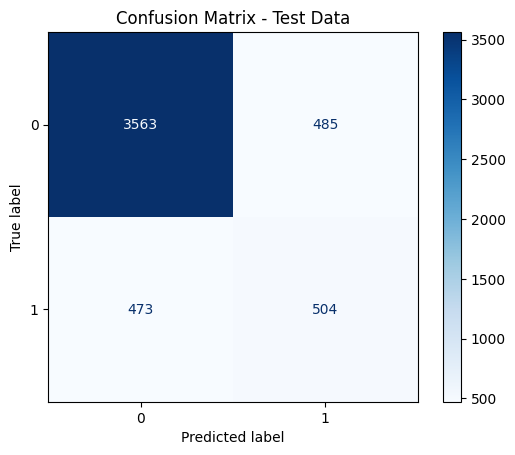

In [61]:
cm_test = confusion_matrix(y_test, y_pred_rf)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=forest_SMOTE.classes_)
disp_test.plot(cmap='Blues')
plt.title("Confusion Matrix - Test Data")
plt.show()

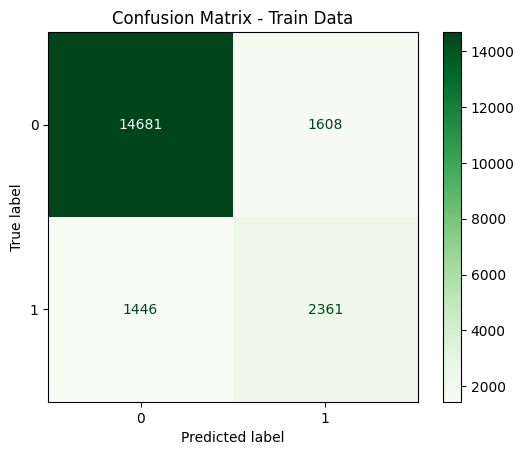

In [62]:
cm_train = confusion_matrix(y_train, y_pred_train)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=forest_SMOTE.classes_)
disp_train.plot(cmap='Greens')
plt.title("Confusion Matrix - Train Data")
plt.show()

In [63]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

In [64]:
y_proba_test = forest_SMOTE.predict_proba(x_test)[:, 1]

In [65]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)
roc_auc = auc(fpr, tpr)

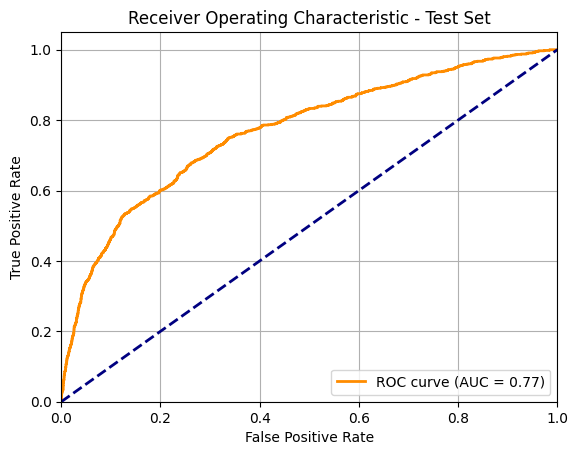

AUC Score (Test Set): 0.769276486663619


In [66]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Test Set')
plt.legend(loc="lower right")
plt.grid()
plt.show()

print("AUC Score (Test Set):", roc_auc)

In [67]:
y_proba_train = forest_SMOTE.predict_proba(x_train)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, y_proba_train)
roc_auc_train = auc(fpr_train, tpr_train)
print("AUC Score (Train Set):", roc_auc_train)


AUC Score (Train Set): 0.8588734353225815


# SHAP

In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(forest_SMOTE)
shap_values = explainer.shap_values(x_test)

In [ ]:
shap_class1 = shap_values[:, :, 1]

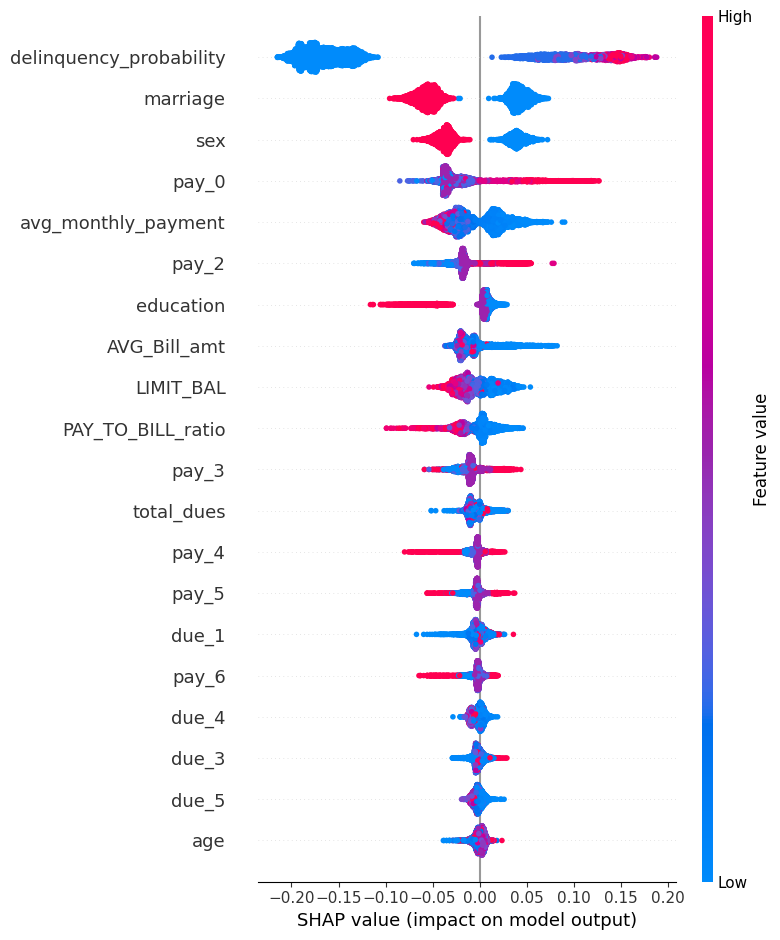

In [ ]:
shap.summary_plot(shap_values[:, :, 1], x_test)

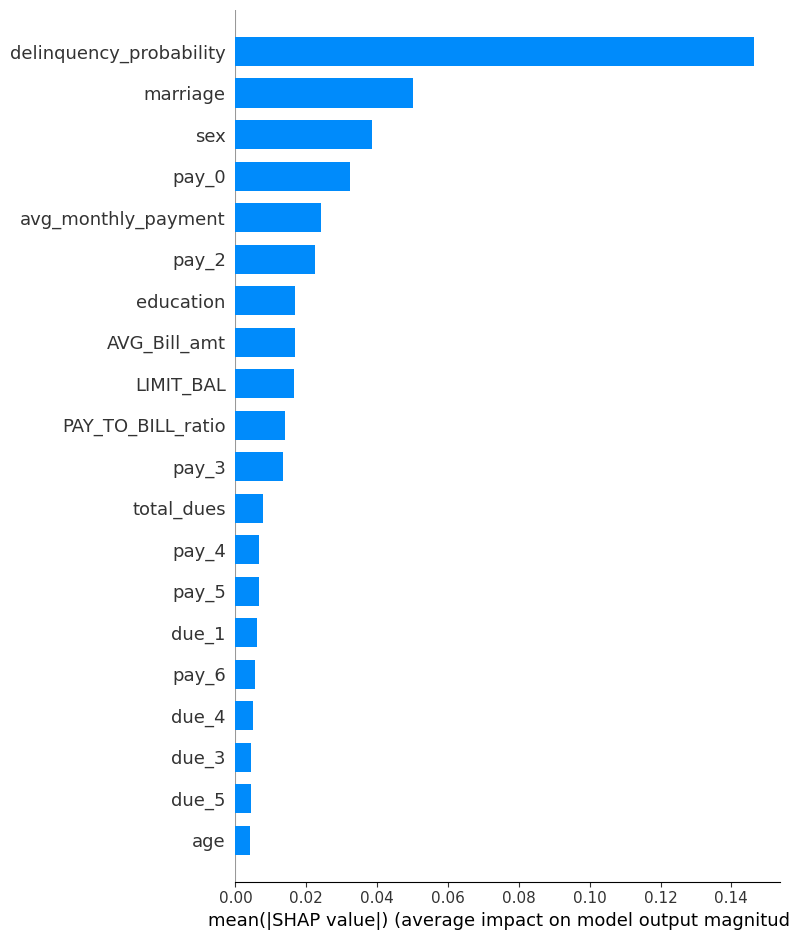

In [ ]:
shap.summary_plot(shap_values[:, :, 1], x_test, plot_type="bar")


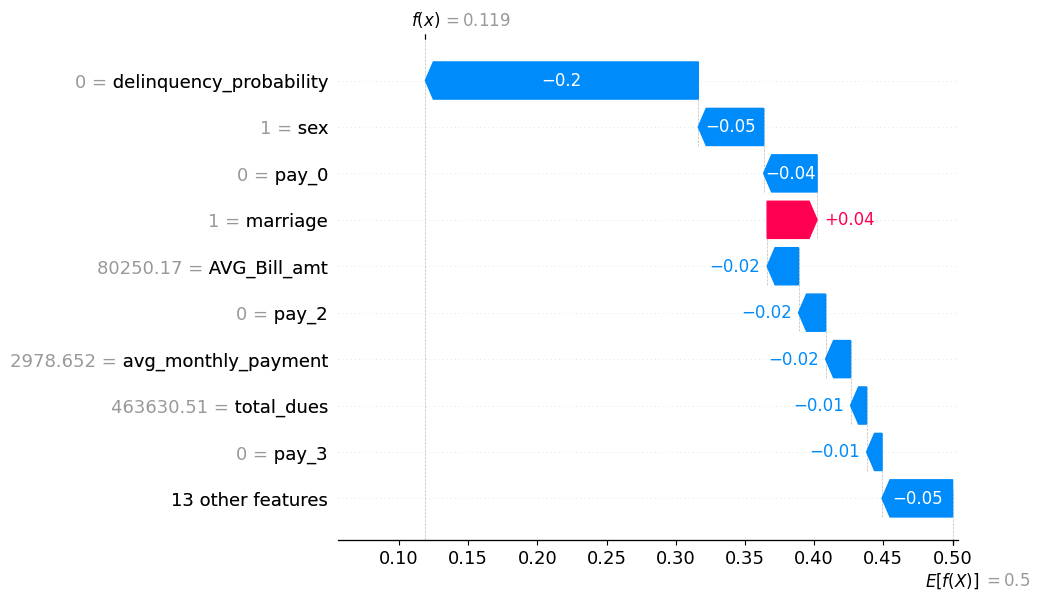

In [ ]:
sample_index = 0
shap_value_row = shap_values[sample_index, :, 1]

shap.plots.waterfall(shap.Explanation(
    values=shap_value_row,
    base_values=explainer.expected_value[1],
    data=x_test.iloc[sample_index],
    feature_names=x_test.columns
))


In [ ]:
shap.initjs()
shap.force_plot(
    explainer.expected_value[1],
    shap_values[sample_index, :, 1],
    x_test.iloc[sample_index]
)


# PREDICTION FOR VALIDATION DATA SET

In [68]:
data_val['total_bill'] = data_val['Bill_amt1'] + data_val['Bill_amt2'] + data_val['Bill_amt3'] + data_val['Bill_amt4'] + data_val['Bill_amt5'] + data_val['Bill_amt6']

In [69]:
data_val['total_payment'] = data_val['pay_amt1'] + data_val['pay_amt2'] + data_val['pay_amt3'] + data_val['pay_amt4'] + data_val['pay_amt5'] + data_val['pay_amt6']

In [70]:
data_val['total_dues'] = data_val['total_bill'] - data_val['total_payment']

In [71]:
data_val['avg_dues'] = data_val['total_dues'].mean()

In [72]:
data_val['avg_monthly_payment'] = data_val['total_payment'] / 6

In [73]:
data_val['due_1'] = data_val['Bill_amt1'] - data_val['pay_amt1']
data_val['due_2'] = data_val['Bill_amt2'] - data_val['pay_amt2']
data_val['due_3'] = data_val['Bill_amt3'] - data_val['pay_amt3']
data_val['due_4'] = data_val['Bill_amt4'] - data_val['pay_amt4']
data_val['due_5'] = data_val['Bill_amt5'] - data_val['pay_amt5']
data_val['due_6'] = data_val['Bill_amt6'] - data_val['pay_amt6']

In [74]:
pay_columns_val = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
data_val['delinquency_probability'] = data_val[pay_columns_val].apply(lambda row: (row >= 1).sum() / len(pay_columns_val), axis=1)

In [75]:
x_val=data_val[['AVG_Bill_amt','LIMIT_BAL','PAY_TO_BILL_ratio','age','avg_monthly_payment','delinquency_probability',
    'due_1','due_2','due_3','due_4','due_5','due_6','education','marriage','pay_0','pay_2','pay_3','pay_4',
   'pay_5','pay_6','sex','total_dues']]

In [76]:
pred_val=forest_SMOTE.predict(x_val)


In [77]:
results = pd.DataFrame({'prediction': pred_val})

In [79]:
results = pd.DataFrame({
    'Customer_ID': data_val['Customer_ID'],
    'default_prediction': pred_val
})

In [81]:
results.to_csv('predictions.csv', index=False)

In [84]:
from google.colab import files
files.download('predictions.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>